# Credit Card Fradulent

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the excel files

data= pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 4 - Credit Card Fraud/creditcard.csv")

In [3]:
# check the first five sample data 

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 31 columns):
Time      663 non-null int64
V1        663 non-null float64
V2        663 non-null float64
V3        663 non-null float64
V4        663 non-null float64
V5        663 non-null float64
V6        663 non-null float64
V7        663 non-null float64
V8        663 non-null float64
V9        663 non-null float64
V10       663 non-null float64
V11       663 non-null float64
V12       663 non-null float64
V13       663 non-null float64
V14       663 non-null float64
V15       663 non-null float64
V16       663 non-null float64
V17       663 non-null float64
V18       663 non-null float64
V19       663 non-null float64
V20       663 non-null float64
V21       663 non-null float64
V22       663 non-null float64
V23       663 non-null float64
V24       663 non-null float64
V25       663 non-null float64
V26       663 non-null float64
V27       663 non-null float64
V28       663 non-null float6

In [5]:
# checking the null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### EDA

In [6]:
# Statistical Analysis

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


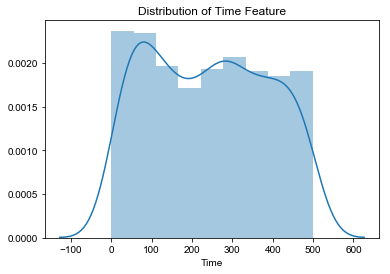

In [7]:
# Lets see the distribution of the time feature 

plt.figure(figsize=(6,4))
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)
sns.set(font_scale=1)

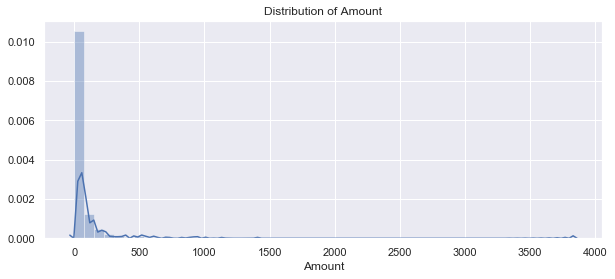

In [8]:
# Lets see the distribution of the Amount feature 

plt.figure(figsize=(10,4))
plt.title('Distribution of Amount')
sns.distplot(data.Amount)

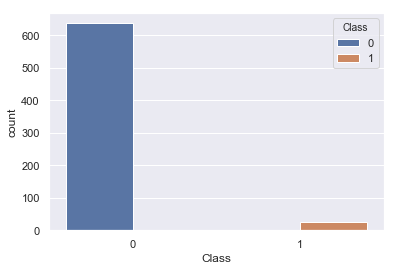

In [9]:
# Lets seehow many fraud and honest transaction are there

sns.countplot(x='Class', data=data, hue= 'Class')

In [10]:
# Lets figure out the fradulent and hoenst transaction in terms of the %age

LabelCount=data.Class.value_counts()

normal=LabelCount[0]
fraud=LabelCount[1]
perc_normal=(normal/(normal+fraud))*100
perc_fraud=(fraud/(normal+fraud))*100
print('There are {} normal transactions ({:.3f}%)) and {} fraudelent transactions ({:.3f}%)'.format(normal,perc_normal, fraud, perc_fraud))

There are 637 normal transactions (96.078%)) and 26 fraudelent transactions (3.922%)


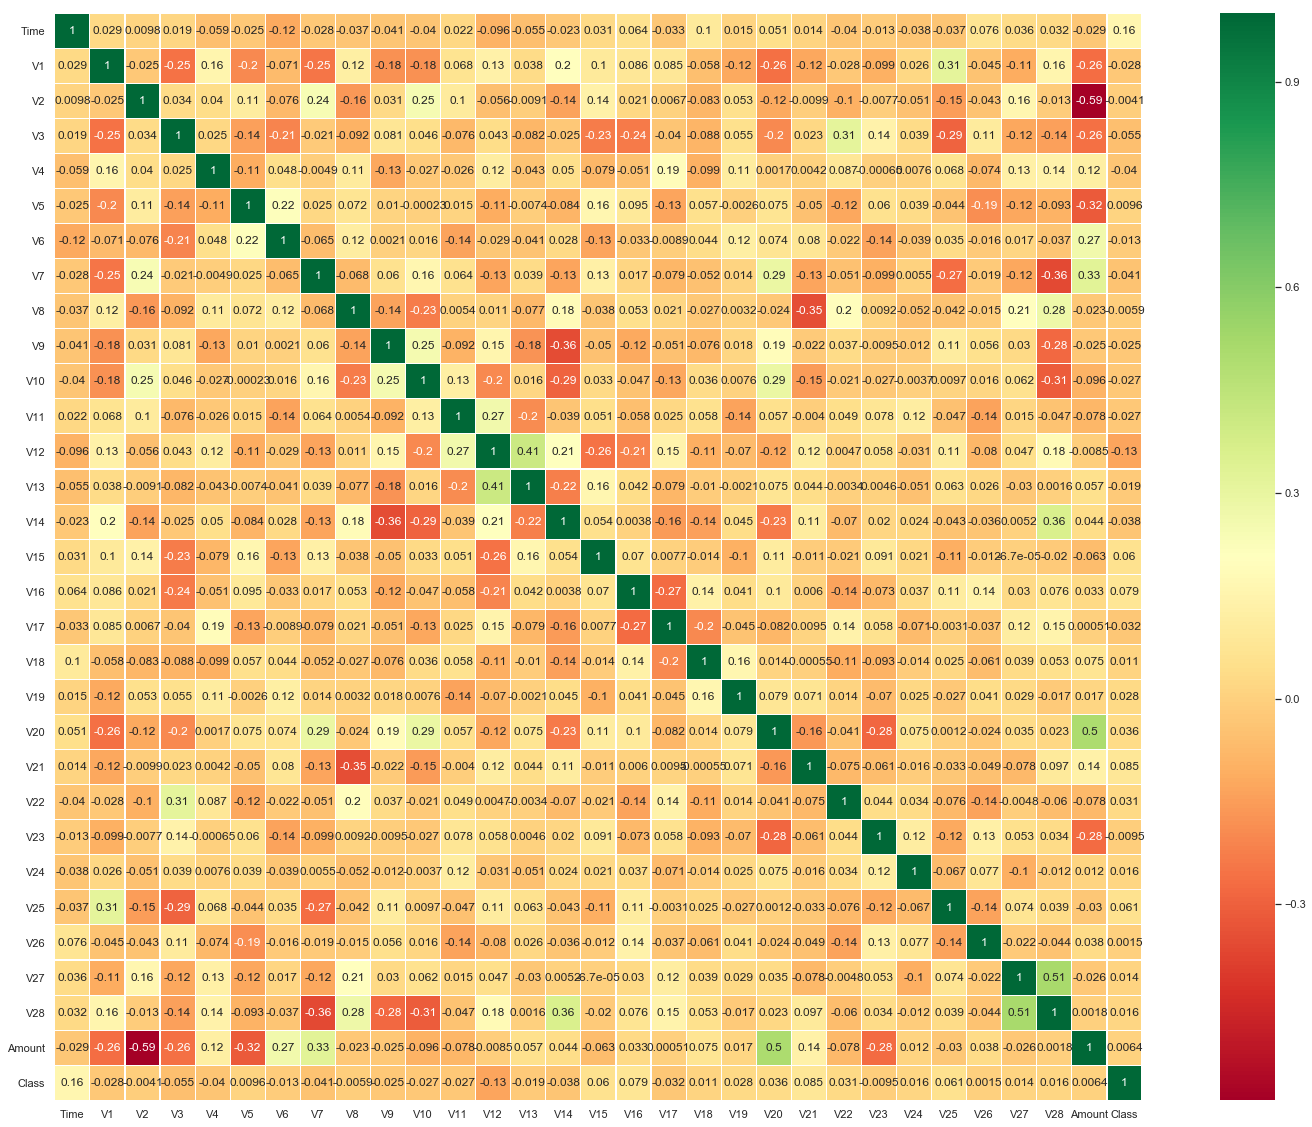

In [11]:
# Lets plot the heat map to see the correlation between the target and features

plt.figure(figsize=(28,20))
sns.heatmap(data.corr(),cmap='RdYlGn',linewidths=0.1,linecolor='w',annot=True,square=True)


In [12]:
# Scaling the features Time and Amount

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
data['normalizedTime'] =sc.fit_transform(data['Time'].values.reshape(-1,1))
data['normalizedAmount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [14]:
data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [15]:
# Segregate the features and target

X = data.drop(['Class'], axis = 1)
y = data['Class']

In [16]:
# Segregate the data set into train and test set

from sklearn.model_selection import train_test_split,KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Implementing all the models

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
# appending all the models in a list

models = []
results = []
names = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=22)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=22, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              m

In [19]:
# Fitting all the models on the training set

for name,model in models:
    k_fold = KFold(n_splits=10,random_state=42)
    cv_score = cross_val_score(model,train_X,y=train_y,scoring='accuracy',cv=k_fold)
    results.append(cv_score)
    names.append(name)
    print('%s %.2f (%.2f)' % (name,(cv_score.mean()*100),(cv_score.std()*100)))

LR 95.04 (2.37)
KNN 96.12 (1.61)
DT 91.82 (3.14)
NB 93.53 (2.87)
RFC 96.12 (1.61)
SVM 96.12 (1.61)


In [20]:
#Since Logistic Regression is the best fitted model

rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_predicted = rfc.predict(test_X)
rfc_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [22]:
#checking the accuracy of the model on the test data

rfc_score = accuracy_score(test_y,rfc_predicted)
print('Accuracy of the model : %.2f' % (rfc_score*100))

print('Classifiction report :')
print(classification_report(test_y,rfc_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,rfc_predicted))

Accuracy of the model : 95.98
Classifiction report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       191
           1       0.00      0.00      0.00         8

   micro avg       0.96      0.96      0.96       199
   macro avg       0.48      0.50      0.49       199
weighted avg       0.92      0.96      0.94       199

confusion matrix :
[[191   0]
 [  8   0]]


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
gb_predicted = gb.predict(test_X)

In [32]:
#checking the accuracy of the model on the test data

gb_score = accuracy_score(test_y,gb_predicted)
print('Accuracy of the model : %.2f' % (gb_score*100))

print('Classifiction report :')
print(classification_report(test_y,gb_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,gb_predicted))

Accuracy of the model : 93.97
Classifiction report :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.00      0.00      0.00         8

   micro avg       0.94      0.94      0.94       199
   macro avg       0.48      0.49      0.48       199
weighted avg       0.92      0.94      0.93       199

confusion matrix :
[[187   4]
 [  8   0]]


In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=200,
    objective='binary:logistic',
    booster='gbtree',
    subsample=0.95,
    colsample_bytree=1,
    reg_alpha=0.1,
    random_state=42)

In [38]:
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0.1,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.95, verbosity=1)

In [39]:
xgb_predicted = xgb.predict(test_X)

In [40]:
#checking the accuracy of the model on the test data

xgb_score = accuracy_score(test_y,gb_predicted)
print('Accuracy of the model : %.2f' % (xgb_score*100))

print('Classifiction report :')
print(classification_report(test_y,xgb_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,xgb_predicted))

Accuracy of the model : 93.97
Classifiction report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       191
           1       0.00      0.00      0.00         8

   micro avg       0.95      0.95      0.95       199
   macro avg       0.48      0.49      0.49       199
weighted avg       0.92      0.95      0.94       199

confusion matrix :
[[189   2]
 [  8   0]]
